In [35]:
%reload_ext autoreload
%autoreload 2

import numpy as np
from alpharaw.thermo import ThermoRawData
from alpharaw.ms_data_base import MSData_Base

In [2]:
from alphabase.spectral_library.base import SpecLibBase
from alphabase.spectral_library.flat import SpecLibFlat

In [26]:


speclib = SpecLibBase()
speclib.load_hdf('/Users/georgwallmann/Documents/data/alphadia_transfer_learning/2024_10_07_zenotof/transfer_pass/speclib.hdf')
#speclib.load_hdf('/Users/georgwallmann/Documents/data/alphadia_performance_tests/libraries/astral/hela_hybrid.hdf')

speclib_flat = SpecLibFlat()
speclib_flat.parse_base_library(speclib)




In [ ]:
import os

tmp_folder = "/Users/georgwallmann/Documents/data/alpha-rs"

In [33]:
speclib_flat.precursor_df.to_parquet(os.path.join(tmp_folder, 'precursor_df.parquet'))
speclib_flat.fragment_df.to_parquet(os.path.join(tmp_folder, 'fragment_df.parquet'))


In [27]:
import alpha_rs

lib = alpha_rs.SpecLibFlat.from_arrays(
    speclib_flat.precursor_df['precursor_mz'].values.astype(np.float32),
    speclib_flat.precursor_df['flat_frag_start_idx'].values,
    speclib_flat.precursor_df['flat_frag_stop_idx'].values,
    speclib_flat.fragment_df['mz'].values.astype(np.float32),
    speclib_flat.fragment_df['intensity'].values.astype(np.float32)
)

In [28]:
lib.num_precursors

3689985

In [36]:
from alpharaw.ms_data_base import MSData_Base

dia_data = MSData_Base()
dia_data.load_hdf('/Users/georgwallmann/Documents/data/alphadia/20205_05_04_chiron/raw_data/sciex/2025031_Evo012_32p5min_Whisper40_Elite.hdf')


AttributeError: property 'name' of 'HDF_Dataset' object has no setter

In [7]:
cycle_len = 301
delta_scan_idx = np.tile(np.arange(cycle_len), int(len(dia_data.spectrum_df) / cycle_len + 1 ))
cycle_idx = np.repeat(np.arange(int(len(dia_data.spectrum_df) / cycle_len + 1 )), cycle_len)

dia_data.spectrum_df['delta_scan_idx'] = delta_scan_idx[:len(dia_data.spectrum_df)]
dia_data.spectrum_df['cycle_idx'] = cycle_idx[:len(dia_data.spectrum_df)]
print(cycle_len)

301


In [32]:

# store dia_data.spectrum_df to tmp_folder as parquet
dia_data.spectrum_df.to_parquet(os.path.join(tmp_folder, 'spectrum_df.parquet'))
dia_data.peak_df.to_parquet(os.path.join(tmp_folder, 'peak_df.parquet'))

In [9]:

import alpha_rs

rs_data = alpha_rs.test_xic_index(
    dia_data.spectrum_df['delta_scan_idx'].values,
    dia_data.spectrum_df['isolation_lower_mz'].values.astype(np.float32),
    dia_data.spectrum_df['isolation_upper_mz'].values.astype(np.float32),
    dia_data.spectrum_df['peak_start_idx'].values,
    dia_data.spectrum_df['peak_stop_idx'].values,
    dia_data.spectrum_df['cycle_idx'].values,
    dia_data.spectrum_df['rt'].values.astype(np.float32),
    dia_data.peak_df['mz'].values.astype(np.float32),
    dia_data.peak_df['intensity'].values.astype(np.float32)
)

In [25]:
lib.num_precursors

10

In [29]:
fwhm_rt = 3
kernel_size = 20

peak_group_scoring = alpha_rs.PeakGroupScoring(fwhm_rt, kernel_size)

In [30]:
mass_tolerance = 7
peak_group_scoring.search(rs_data, lib, mass_tolerance)

Precursors per second: 322333.78


(20,)


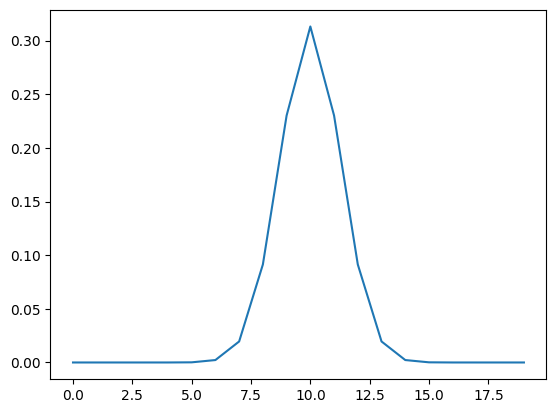

In [13]:
import matplotlib.pyplot as plt

kernel_path = '/Users/georgwallmann/Documents/data/alpha-rs/kernel.npz'
array = np.load(kernel_path)['kernel']
print(array.shape)
plt.plot(array)
plt.show()

In [14]:
path = '/Users/georgwallmann/Documents/data/alpha-rs/dense_xic.npz'

In [15]:
array = np.load(path)['dense_xic']
array.shape

(10, 806)

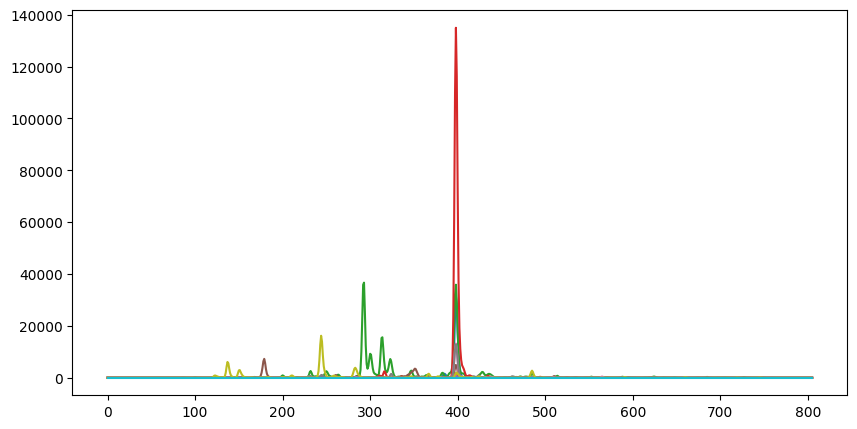

In [17]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(10, 5))
for i in range(array.shape[0]):
    ax.plot(array[i])
plt.show()


In [10]:
dia_data.peak_df

,intensity,mz
0,7152.893066,413.284882
1,7339.181641,461.691620
2,8405.365234,479.127350
3,7875.626953,486.764893
4,7765.384766,495.953583
...,...,...
155906486,347.197144,867.576721
155906487,249.008377,875.574829
155906488,388.607117,1288.736450
155906489,181.067413,1454.766968


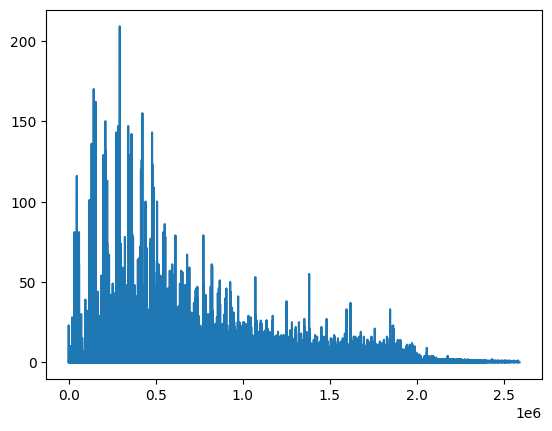

In [14]:
import matplotlib.pyplot as plt

plt.plot(hist)